In [ ]:
import pandas as pd

# Load the datasets
resume_data_path = "srd.csv"
job_data_path = "jd.csv"

# Read the CSV files
resume_df = pd.read_csv(resume_data_path)

job_df = pd.read_csv(job_data_path, on_bad_lines="skip", encoding="utf-8")

# Check for missing values
print("Missing Values in Resume Dataset:\n", resume_df.isnull().sum(), "\n")
print("Missing Values in Job Dataset:\n", job_df.isnull().sum(), "\n")

# Check data types
print("Data Types in Resume Dataset:\n", resume_df.dtypes, "\n")
print("Data Types in Job Dataset:\n", job_df.dtypes, "\n")


Missing Values in Resume Dataset:
 Name                    0
Job Title               0
Skills                  0
Experience (Years)      0
Education               0
Certification         517
Location                0
dtype: int64 

Missing Values in Job Dataset:
 company_name           478
title                    0
description              2
max_salary           19143
location                 0
currency             17857
normalized_salary    17857
fips                  5272
dtype: int64 

Data Types in Resume Dataset:
 Name                  object
Job Title             object
Skills                object
Experience (Years)     int64
Education             object
Certification         object
Location              object
dtype: object 

Data Types in Job Dataset:
 company_name          object
title                 object
description           object
max_salary           float64
location              object
currency              object
normalized_salary    float64
fips                 flo

In [ ]:
# Fix missing values in Resume Dataset
resume_df["Certification"].fillna("No Certification", inplace=True)

# Drop rows with missing job descriptions
job_df = job_df.dropna(subset=["description"])

# Drop columns with too many missing values
job_df.drop(["max_salary", "currency", "normalized_salary", "fips"], axis=1, inplace=True)

# Display updated missing values
print("Missing Values in Resume Dataset after cleaning:\n", resume_df.isnull().sum(), "\n")
print("Missing Values in Job Dataset after cleaning:\n", job_df.isnull().sum(), "\n")

# Display the first few rows to check
resume_df.head(), job_df.head()


Missing Values in Resume Dataset after cleaning:
 Name                  0
Job Title             0
Skills                0
Experience (Years)    0
Education             0
Certification         0
Location              0
dtype: int64 

Missing Values in Job Dataset after cleaning:
 company_name    478
title             0
description       0
location          0
dtype: int64 



C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\1454134084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  resume_df["Certification"].fillna("No Certification", inplace=True)


(                Name       Job Title  \
 0       Marc Collins     ML Engineer   
 1    Kristy Williams  Data Scientist   
 2  Robert Cunningham   Data Engineer   
 3    Jonathan Reeves   Data Engineer   
 4     Jennifer Davis    Data Analyst   
 
                                               Skills  Experience (Years)  \
 0      Scikit-learn, TensorFlow, NLP, Keras, PyTorch                  11   
 1  Machine Learning, R, Deep Learning, Pandas, Te...                  13   
 2                     SQL, Spark, ETL, Kafka, Python                   6   
 3                                   AWS, Python, SQL                  14   
 4  Data Visualization, SQL, Excel, Power BI, Pyth...                   6   
 
     Education         Certification          Location  
 0    Master's       Microsoft Azure  Blackwellborough  
 1  Bachelor's         AWS Certified        Parkertown  
 2    Master's  Google Data Engineer         Sonyastad  
 3         PhD         AWS Certified         Lake Mary  
 4 

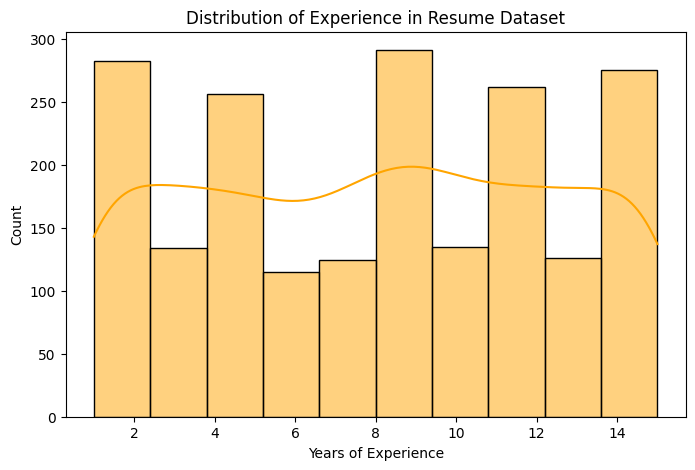

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot experience distribution
plt.figure(figsize=(8, 5))
sns.histplot(resume_df["Experience (Years)"], bins=10, kde=True, color="orange")
plt.title("Distribution of Experience in Resume Dataset")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()


C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\2330009418.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Skill", data=skills_df, palette="viridis")


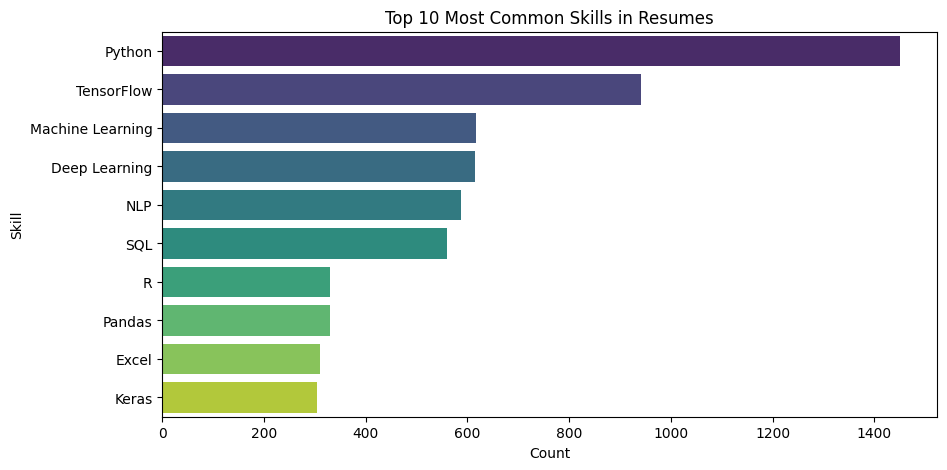

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Split skills into a list
all_skills = ", ".join(resume_df["Skills"]).split(", ")

# Count most common skills
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=["Skill", "Count"])

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Skill", data=skills_df, palette="viridis")
plt.title("Top 10 Most Common Skills in Resumes")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\3013157619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Job Title", data=jobs_df, palette="coolwarm")


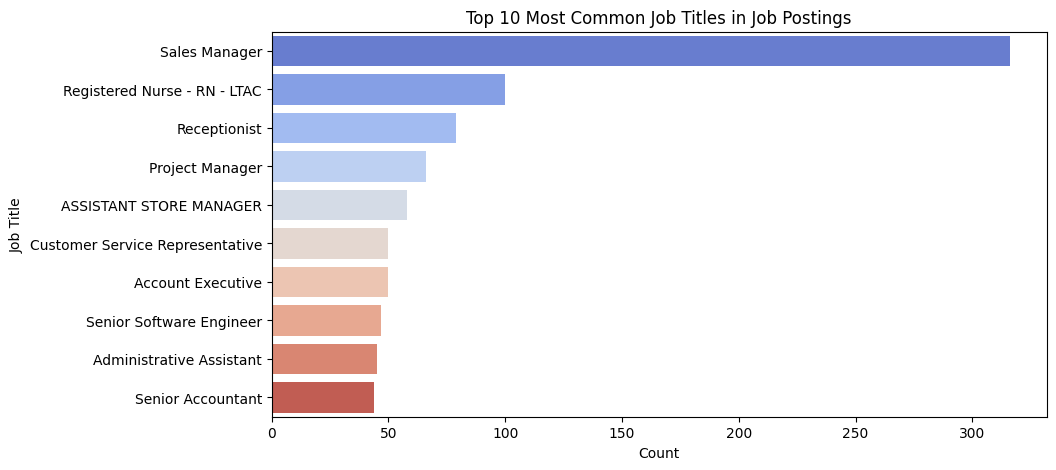

In [ ]:
# Count most common job titles
top_jobs = job_df["title"].value_counts().nlargest(10)

# Convert to DataFrame
jobs_df = pd.DataFrame({"Job Title": top_jobs.index, "Count": top_jobs.values})

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Job Title", data=jobs_df, palette="coolwarm")
plt.title("Top 10 Most Common Job Titles in Job Postings")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
import numpy as np

c:\Users\Amit\practice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert resume skills and job descriptions into sentence embeddings
resume_embeddings = model.encode(resume_df["Skills"].tolist(), convert_to_tensor=True)
job_embeddings = model.encode(job_df["description"].tolist(), convert_to_tensor=True)

# Compute cosine similarity between resumes and job descriptions
similarity_scores = util.pytorch_cos_sim(resume_embeddings, job_embeddings)

# Convert similarity scores to a DataFrame
skills_df = pd.DataFrame(similarity_scores.cpu().numpy(), index=resume_df["Name"], columns=job_df["title"])

skills_df.to_csv("skills_similarity_scores.csv")

print("Computed `skills_df` with BERT embeddings.")
print("Sample Skills Similarity Scores:\n", skills_df.head(5))


Computed `skills_df` with BERT embeddings.
Sample Skills Similarity Scores:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                    0.042350                           0.120169   
Kristy Williams                 0.108883                           0.044075   
Robert Cunningham               0.178427                           0.034156   
Jonathan Reeves                 0.101991                           0.029944   
Jennifer Davis                  0.188320                           0.030220   

title              Assitant Restaurant Manager  \
Name                                             
Marc Collins                          0.077701   
Kristy Williams                       0.032778   
Robert Cunningham                     0.091562   
Jonathan Reeves                       0.006160   
Jennifer Davis                        0.036926   

title             

In [ ]:
# Check if skills_df exists in memory
if "skills_df" in locals():
    print("skills_df is already available. No need to rerun BERT.")
    print("Sample Skills Similarity Scores:\n", skills_df.head(10))
else:
    print("skills_df is missing. You may need to rerun BERT.")


skills_df is already available. No need to rerun BERT.
Sample Skills Similarity Scores:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                    0.042350                           0.120169   
Kristy Williams                 0.108883                           0.044075   
Robert Cunningham               0.178427                           0.034156   
Jonathan Reeves                 0.101991                           0.029944   
Jennifer Davis                  0.188320                           0.030220   
Matthew Moore                   0.152846                           0.092715   
Rebecca Smith                   0.115151                           0.058203   
Shelly Porter                   0.053374                           0.095665   
Rachel Franklin                 0.115459                           0.053310   
Jill Adams                      0.123293  

In [ ]:
print("skills_df Shape:", skills_df.shape)
print("skills_df Sample Data:\n", skills_df.head(5))


skills_df Shape: (2000, 24542)
skills_df Sample Data:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                    0.042350                           0.120169   
Kristy Williams                 0.108883                           0.044075   
Robert Cunningham               0.178427                           0.034156   
Jonathan Reeves                 0.101991                           0.029944   
Jennifer Davis                  0.188320                           0.030220   

title              Assitant Restaurant Manager  \
Name                                             
Marc Collins                          0.077701   
Kristy Williams                       0.032778   
Robert Cunningham                     0.091562   
Jonathan Reeves                       0.006160   
Jennifer Davis                        0.036926   

title              Senior Elder Law / Tr

In [ ]:
import numpy as np

# Ensure job_df is a copy before modification
job_df = job_df.copy()

# Function to correctly estimate job experience
def estimate_experience(description, title):
    import re
    match = re.findall(r'(\d+)\s*(?:\+|-|years|yrs|year|experience)', description, re.IGNORECASE)

    # Convert matches to int
    experience_values = [int(x) for x in match if int(x) < 50]

    if experience_values:
        return max(experience_values)

    # Infer from job title if experience isn't mentioned
    elif "Senior" in title or "Lead" in title or "Manager" in title:
        return np.random.randint(6, 10)
    elif "Junior" in title or "Entry" in title:
        return np.random.randint(0, 2)
    else:
        return np.nan

# Apply function to extract experience from job descriptions and job titles
job_df["Estimated Experience"] = job_df.apply(lambda row: estimate_experience(row["description"], row["title"]), axis=1)

# Fill remaining missing values with median experience after correction
job_df.loc[:, "Estimated Experience"] = job_df["Estimated Experience"].fillna(job_df["Estimated Experience"].median())

# Debug Step: Check unique experience values after correction
print("Unique job experience estimates after correction:\n", job_df["Estimated Experience"].value_counts().sort_index())


Unique job experience estimates after correction:
 Estimated Experience
0.0      716
1.0     1061
2.0     1379
3.0     1426
4.0      725
5.0     2244
6.0      800
7.0     8192
8.0      906
9.0      423
10.0    1486
11.0      29
12.0     353
13.0     152
14.0      69
15.0     248
16.0     101
17.0      46
18.0    1044
19.0      34
20.0     395
21.0     267
22.0      89
23.0     112
24.0     198
25.0     285
26.0      45
27.0      29
28.0      21
29.0      30
30.0     620
31.0      38
32.0      35
33.0      13
34.0      26
35.0     182
36.0      31
37.0       7
38.0      28
39.0       5
40.0     407
41.0      19
42.0      11
43.0       9
44.0       7
45.0      67
46.0       6
47.0      83
48.0      39
49.0       4
Name: count, dtype: int64


In [ ]:
# Define Experience Score Function
def experience_score(resume_exp, job_exp):
    if job_exp == 0:
        return 1.0
    elif abs(resume_exp - job_exp) <= 1:
        return 1.0
    elif abs(resume_exp - job_exp) <= 3:
        return 0.75
    elif abs(resume_exp - job_exp) <= 5:
        return 0.5
    else:
        return 0.1

print("experience_score function has been redefined.")


experience_score function has been redefined.


In [ ]:
for i in range(10):
    resume_exp = resume_df.iloc[i]["Experience (Years)"]
    job_exp = job_df.iloc[i]["Estimated Experience"]
    score = experience_score(resume_exp, job_exp)
    print(f"Resume {resume_df.iloc[i]['Name']} ({resume_exp} years) vs Job {job_df.iloc[i]['title']} ({job_exp} years) -> Score: {score}")


Resume Marc Collins (11 years) vs Job Marketing Coordinator (18.0 years) -> Score: 0.1
Resume Kristy Williams (13 years) vs Job Mental Health Therapist/Counselor (7.0 years) -> Score: 0.1
Resume Robert Cunningham (6 years) vs Job Assitant Restaurant Manager (41.0 years) -> Score: 0.1
Resume Jonathan Reeves (14 years) vs Job Senior Elder Law / Trusts and Estates Associate Attorney (15.0 years) -> Score: 1.0
Resume Jennifer Davis (6 years) vs Job  Service Technician (5.0 years) -> Score: 1.0
Resume Matthew Moore (9 years) vs Job Economic Development and Planning Intern (14.0 years) -> Score: 0.5
Resume Rebecca Smith (11 years) vs Job Producer (7.0 years) -> Score: 0.5
Resume Shelly Porter (9 years) vs Job Building Engineer (5.0 years) -> Score: 0.5
Resume Rachel Franklin (15 years) vs Job Respiratory Therapist (1.0 years) -> Score: 0.1
Resume Jill Adams (10 years) vs Job Worship Leader (9.0 years) -> Score: 1.0


In [ ]:
import numpy as np
import pandas as pd

# Compute Experience Scores
experience_scores = np.array([
    [experience_score(resume_exp, job_exp) for job_exp in job_df["Estimated Experience"]]
    for resume_exp in resume_df["Experience (Years)"]
])

# Convert to DataFrame
experience_df = pd.DataFrame(experience_scores, index=resume_df["Name"], columns=job_df["title"])

# Display sample data
print("experience_df has been successfully created.")
print("Sample Experience Scores:\n", experience_df.head(10))



experience_df has been successfully created.
Sample Experience Scores:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                        0.10                               0.50   
Kristy Williams                     0.50                               0.10   
Robert Cunningham                   0.10                               1.00   
Jonathan Reeves                     0.50                               0.10   
Jennifer Davis                      0.10                               1.00   
Matthew Moore                       0.10                               0.75   
Rebecca Smith                       0.10                               0.50   
Shelly Porter                       0.10                               0.75   
Rachel Franklin                     0.75                               0.10   
Jill Adams                          0.10                   

In [ ]:
print(experience_df.head(10))


title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                        0.10                               0.50   
Kristy Williams                     0.50                               0.10   
Robert Cunningham                   0.10                               1.00   
Jonathan Reeves                     0.50                               0.10   
Jennifer Davis                      0.10                               1.00   
Matthew Moore                       0.10                               0.75   
Rebecca Smith                       0.10                               0.50   
Shelly Porter                       0.10                               0.75   
Rachel Franklin                     0.75                               0.10   
Jill Adams                          0.10                               0.75   

title              Assitant Restaurant Manager  \
N

In [ ]:
print("Columns in resume_df:\n", resume_df.columns)


Columns in resume_df:
 Index(['Name', 'Job Title', 'Skills', 'Experience (Years)', 'Education',
       'Certification', 'Location'],
      dtype='object')


In [ ]:
print("Columns in resume_df:\n", resume_df.columns)


Columns in resume_df:
 Index(['Name', 'Job Title', 'Skills', 'Experience (Years)', 'Education',
       'Certification', 'Location'],
      dtype='object')


In [ ]:
def map_education_level(education_text):
    education_text = str(education_text).lower()
    if "phd" in education_text or "doctor" in education_text:
        return 3
    elif "master" in education_text or "mba" in education_text:
        return 2
    elif "bachelor" in education_text or "degree" in education_text:
        return 1
    else:
        return 0
# Apply mapping to create the Education Level column
resume_df["Education Level"] = resume_df["Education"].apply(map_education_level)

print("'Education Level' column has been created.")
print(resume_df[["Education", "Education Level"]].head(10))


'Education Level' column has been created.
    Education  Education Level
0    Master's                2
1  Bachelor's                1
2    Master's                2
3         PhD                3
4         PhD                3
5         PhD                3
6         PhD                3
7  Bachelor's                1
8  Bachelor's                1
9         PhD                3


In [ ]:
print("Resume Education Levels:\n", resume_df["Education Level"].value_counts().sort_index())


Resume Education Levels:
 Education Level
1    690
2    647
3    663
Name: count, dtype: int64


In [ ]:
print("Columns in job_df:\n", list(job_df.columns))


Columns in job_df:
 ['company_name', 'title', 'description', 'location', 'Estimated Experience']


In [ ]:
import re

def extract_education_level(description):
    description = str(description).lower()
    if re.search(r"phd|doctorate", description):
        return 3
    elif re.search(r"master|mba", description):
        return 2
    elif re.search(r"bachelor|undergraduate", description):
        return 1
    else:
        return 0

# Apply function to create Required Education column
job_df["Required Education"] = job_df["description"].apply(extract_education_level)

print("'Required Education' column has been created.")
print(job_df[["title", "Required Education"]].head(10))


'Required Education' column has been created.
                                               title  Required Education
0                              Marketing Coordinator                   0
1                  Mental Health Therapist/Counselor                   2
2                        Assitant Restaurant Manager                   0
3  Senior Elder Law / Trusts and Estates Associat...                   0
4                                 Service Technician                   0
5           Economic Development and Planning Intern                   1
6                                           Producer                   0
7                                  Building Engineer                   0
8                              Respiratory Therapist                   1
9                                     Worship Leader                   0


In [ ]:
import numpy as np
import pandas as pd

# Define Education Score Function
def education_score(resume_edu, job_edu):
    if resume_edu >= job_edu:
        return 1.0
    elif resume_edu + 1 == job_edu:
        return 0.75
    elif resume_edu + 2 == job_edu:
        return 0.5
    else:
        return 0.1

# Compute Education Scores
education_scores = np.array([
    [education_score(resume_edu, job_edu) for job_edu in job_df["Required Education"]]
    for resume_edu in resume_df["Education Level"]
])

# Convert to DataFrame
education_df = pd.DataFrame(education_scores, index=resume_df["Name"], columns=job_df["title"])

# Display sample data
print("education_df has been successfully created.")
print("Sample Education Scores:\n", education_df.head(10))


education_df has been successfully created.
Sample Education Scores:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                         1.0                               1.00   
Kristy Williams                      1.0                               0.75   
Robert Cunningham                    1.0                               1.00   
Jonathan Reeves                      1.0                               1.00   
Jennifer Davis                       1.0                               1.00   
Matthew Moore                        1.0                               1.00   
Rebecca Smith                        1.0                               1.00   
Shelly Porter                        1.0                               0.75   
Rachel Franklin                      1.0                               0.75   
Jill Adams                           1.0                     

In [ ]:
for i in range(10):
    resume_edu = resume_df.iloc[i]["Education Level"]
    job_edu = job_df.iloc[i]["Required Education"]
    score = education_score(resume_edu, job_edu)
    print(f"Resume {resume_df.iloc[i]['Name']} (Education: {resume_edu}) vs Job {job_df.iloc[i]['title']} (Required: {job_edu}) -> Score: {score}")

Resume Marc Collins (Education: 2) vs Job Marketing Coordinator (Required: 0) -> Score: 1.0
Resume Kristy Williams (Education: 1) vs Job Mental Health Therapist/Counselor (Required: 2) -> Score: 0.75
Resume Robert Cunningham (Education: 2) vs Job Assitant Restaurant Manager (Required: 0) -> Score: 1.0
Resume Jonathan Reeves (Education: 3) vs Job Senior Elder Law / Trusts and Estates Associate Attorney (Required: 0) -> Score: 1.0
Resume Jennifer Davis (Education: 3) vs Job  Service Technician (Required: 0) -> Score: 1.0
Resume Matthew Moore (Education: 3) vs Job Economic Development and Planning Intern (Required: 1) -> Score: 1.0
Resume Rebecca Smith (Education: 3) vs Job Producer (Required: 0) -> Score: 1.0
Resume Shelly Porter (Education: 1) vs Job Building Engineer (Required: 0) -> Score: 1.0
Resume Rachel Franklin (Education: 1) vs Job Respiratory Therapist (Required: 1) -> Score: 1.0
Resume Jill Adams (Education: 3) vs Job Worship Leader (Required: 0) -> Score: 1.0


In [ ]:
import numpy as np

# Get unique values from education_df
unique_scores = np.unique(education_df.values)

print("Unique Education Scores in education_df:\n", unique_scores)


Unique Education Scores in education_df:
 [0.5  0.75 1.  ]


In [ ]:
# Sample 10 random scores from the dataframe
sample_scores = education_df.sample(10).values.flatten()

print("Sample Education Scores in education_df:\n", sample_scores)


Sample Education Scores in education_df:
 [1. 1. 1. ... 1. 1. 1.]


In [ ]:
education_scores = np.array([
    [education_score(resume_edu, job_edu) for job_edu in job_df["Required Education"]]
    for resume_edu in resume_df["Education Level"]
])

# Reassign scores to DataFrame
education_df = pd.DataFrame(education_scores, index=resume_df["Name"], columns=job_df["title"])


In [ ]:
# Sort education scores to see the lowest matches first
top_education_matches = education_df.stack().reset_index()
top_education_matches.columns = ["Resume", "Job Title", "Education Score"]

# Sort by lowest education score first
top_education_matches = top_education_matches.sort_values(by="Education Score", ascending=True)

# Show bottom 10
print("Bottom 10 Education-Based Matches:\n", top_education_matches.head(10))

# Show top 10
print("\nTop 10 Education-Based Matches:\n", top_education_matches.tail(10))


Bottom 10 Education-Based Matches:
                   Resume                                          Job Title  \
44347103  William Jarvis                          Machine Learning Engineer   
44347096  William Jarvis                                    Content Analyst   
44347162  William Jarvis  SURVEY RESEARCH DIRECTOR OR SENIOR RESEARCH MA...   
44347015  William Jarvis                                  Lead Data Analyst   
44347027  William Jarvis                               Immigration Attorney   
44347063  William Jarvis                          Principal Biostatistician   
256185     Cindy Collier            Income and Withholding Tax Data Analyst   
44346718  William Jarvis          Assistant Professor of Business Analytics   
44346595  William Jarvis        Physical Therapist - $5,000 Sign On Bonus!!   
44346593  William Jarvis  Vice President, TTR Disease Area Medical Affai...   

          Education Score  
44347103              0.5  
44347096              0.5  
44347162  

In [ ]:
if "skills_df" in locals():
    print("skills_df exists.")
else:
    print("skills_df is missing. We need to recreate it.")


skills_df exists.


In [ ]:
print("Sample Skills Similarity Scores:\n", skills_df.head(10))


Sample Skills Similarity Scores:
 title              Marketing Coordinator  Mental Health Therapist/Counselor  \
Name                                                                          
Marc Collins                    0.042350                           0.120169   
Kristy Williams                 0.108883                           0.044075   
Robert Cunningham               0.178427                           0.034156   
Jonathan Reeves                 0.101991                           0.029944   
Jennifer Davis                  0.188320                           0.030220   
Matthew Moore                   0.152846                           0.092715   
Rebecca Smith                   0.115151                           0.058203   
Shelly Porter                   0.053374                           0.095665   
Rachel Franklin                 0.115459                           0.053310   
Jill Adams                      0.123293                           0.072140   

title            

In [ ]:
from sklearn.preprocessing import MinMaxScaler


N = 30000

# Reduce memory usage by selecting a smaller subset
skills_sample = skills_df.stack(dropna=True).reset_index().sample(N, random_state=42)
experience_sample = experience_df.stack(dropna=True).reset_index().sample(N, random_state=42)
education_sample = education_df.stack(dropna=True).reset_index().sample(N, random_state=42)

# Rename columns
skills_sample.columns = ["Resume", "Job Title", "Skills Score"]
experience_sample.columns = ["Resume", "Job Title", "Experience Score"]
education_sample.columns = ["Resume", "Job Title", "Education Score"]

# Merge in small steps
small_df = skills_sample.merge(experience_sample, on=["Resume", "Job Title"], how="inner", copy=False)
small_df = small_df.merge(education_sample, on=["Resume", "Job Title"], how="inner", copy=False)

print("Merged small dataset successfully.")
print("Sample Data:\n", small_df.head(10))


C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\1679252806.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  skills_sample = skills_df.stack(dropna=True).reset_index().sample(N, random_state=42)
C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\1679252806.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  experience_sample = experience_df.stack(dropna=True).reset_index().sample(N, random_state=42)
C:\Users\Amit\AppData\Local\Temp\ipykernel_36368\1679252806.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version 

Merged small dataset successfully.
Sample Data:
              Resume                                          Job Title  \
0     David Alvarez                               Datasphere Architect   
1      Terri Greene              International Distribution Specialist   
2      Rachel Henry                                    Project Manager   
3   Brenda Williams                         Oracle EPM Project Manager   
4    Carol Alvarado                              Power Design Engineer   
5      Todd Jenkins                             Order_Entry_Specialist   
6      Tara Gardner                          Cyber Security Analyst II   
7   Stephen Shannon  Certified Medical Assistant (CMA), OBGYN, Full...   
8      Raymond Bell                     Security Officer - Guard Shack   
9  Michael Williams      Research Assistant II - Animal Care (65426BR)   

   Skills Score  Experience Score  Education Score  
0      0.205382              0.10              1.0  
1      0.074198              1

In [ ]:
# Normalize scores
scaler = MinMaxScaler()
small_df[["Skills Score", "Experience Score", "Education Score"]] = scaler.fit_transform(
    small_df[["Skills Score", "Experience Score", "Education Score"]]
)

# Assign Weights
SKILLS_WEIGHT = 0.5
EXPERIENCE_WEIGHT = 0.3
EDUCATION_WEIGHT = 0.2

# Compute Final Score
small_df["Final Score"] = (
    small_df["Skills Score"] * SKILLS_WEIGHT +
    small_df["Experience Score"] * EXPERIENCE_WEIGHT +
    small_df["Education Score"] * EDUCATION_WEIGHT
)

# Sort by highest match
small_df = small_df.sort_values(by="Final Score", ascending=False)

print("Computed Final Score successfully.")
print("Sample Data:\n", small_df.head(10))


Computed Final Score successfully.
Sample Data:
                   Resume                                          Job Title  \
5714         Glen Barton                                Power BI Developer    
18046  Robert Cunningham                         ETL Data Software Engineer   
26974        Karen Davis          Data Engineer (SAP ECC To HANA Migration)   
14548       Molly Brandt                                   Looker Developer   
13263    Crystal Webster                    AI Training for Nuclear Physics   
26693    Isabella Kelley          NVIDIA Jetson - Embedded System Developer   
15008    Kimberly Turner                                  HR Generalist, US   
14031    Brianna Stevens                   Senior Machine Learning Engineer   
18986      Amanda Kaiser  Robotics Test & Release Engineer (Defense Tech...   
6120           Erik Yang  Internship, ML Performance Software Engineer, ...   

       Skills Score  Experience Score  Education Score  Final Score  
5714       

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

X = small_df[["Skills Score", "Experience Score", "Education Score"]]
y = (small_df["Final Score"] > 0.7).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model (With Balanced Class Weights to Improve Recall)
svm_model = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
svm_preds = svm_model.predict(X_test)

# Evaluate SVM Model
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)

# Print SVM Results
print("SVM Model Results (With Improved Recall):")
print(f"  - Accuracy: {svm_accuracy:.4f}")
print(f"  - Precision: {svm_precision:.4f}")
print(f"  - F1 Score: {svm_f1:.4f}")
print("\nSVM Classification Report:\n", classification_report(y_test, svm_preds))


SVM Model Results (With Improved Recall):
  - Accuracy: 0.9853
  - Precision: 0.8022
  - F1 Score: 0.8902

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5739
           1       0.80      1.00      0.89       365

    accuracy                           0.99      6104
   macro avg       0.90      0.99      0.94      6104
weighted avg       0.99      0.99      0.99      6104



In [ ]:
!pip install PyMuPDF
import fitz

def extract_resume_text(pdf_path):
    with fitz.open(pdf_path) as doc:
        text = ""
        for page in doc:
            text += page.get_text("text") + "\n"
    return text

# Extract text from the resume PDF
resume_text = extract_resume_text("RESUME.pdf")
print("Extracted Resume Text:\n", resume_text[:500])

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
    --------------------------------------- 0.3/16.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.5 MB 195.8 kB/s eta 0:01:22
   - -------------------------------------- 0.5/16.5 MB 195.8 kB/s eta 0:01:22
   - -------------------------------------- 0.5/16.5 MB 195.8 kB/s eta 0:01:22
   - -------------------------------------- 0.5/16.5 MB 195.8 k

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the extracted resume text
resume_embedding = model.encode(resume_text, convert_to_tensor=True)

# Encode all job descriptions
job_embeddings = model.encode(small_df["Job Title"].tolist(), convert_to_tensor=True)

# Compute similarity scores
similarity_scores = util.pytorch_cos_sim(resume_embedding, job_embeddings)

# Convert similarity scores
small_df["Similarity Score"] = similarity_scores.cpu().numpy().flatten()

# Sort jobs by similarity score
sorted_jobs = small_df.sort_values(by="Similarity Score", ascending=False)

# Drop duplicates to keep only unique job titles
unique_jobs = sorted_jobs.drop_duplicates(subset=["Job Title"])

top_matches = unique_jobs.head(5)

# Display Results
print("Top 5 Unique Job Matches for the Resume:\n", top_matches[["Job Title", "Similarity Score"]])



Top 5 Unique Job Matches for the Resume:
                                 Job Title  Similarity Score
6820              Data Analytics Engineer          0.659164
833                    Analytics Engineer          0.640363
1338               Sr. Analytics Engineer          0.629877
20184     Business Intelligence Developer          0.620728
29923  Sr. Data Intelligence Analyst- RWE          0.604768
